In [1]:
import os
import re
import pandas as pd
import numpy as nump
import nltk
from nltk.corpus import stopwords
import wordcloud as wc
import matplotlib.pyplot as plt
from textblob import TextBlob
from textblob.classifiers import DecisionTreeClassifier, NaiveBayesClassifier
import wordcloud as wc
import matplotlib.pyplot as plt
from imageio import imread
import warnings
import datetime
import string
import unicodedata
import seaborn as sns
from collections import Counter
from datetime import datetime
from datetime import date

# Methods

In [2]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r' ', str(text))

In [3]:
def remove_links(text):
    # link_pattern  = re.compile(r'^https?:\/\/.*[\r\n]*', flags=re.MULTILINE)
    # link_pattern = re.compile(r''''(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*''')
    # return link_pattern.sub(r' ', text)
    return re.sub('http://\S+|https://\S+', '', str(text))

In [4]:
def remove_accent(text):
    try:
        text = unicode(text, 'utf-8')
    except (TypeError, NameError): # unicode is a default on python 3 
        pass
    text = unicodedata.normalize('NFD', text)
    text = text.encode('ascii', 'ignore')
    text = text.decode("utf-8")
    return str(text)

In [5]:
def remove_ponctuation(text):
    output = text.translate(str.maketrans('', '', string.punctuation))
    return output

In [6]:
#cleaning tweet
def clean_tweet(tweet):
    text = remove_emoji(tweet)
    text = remove_links(text)
    text = text.lower()
#     text = remove_accent(text)
    text = remove_ponctuation(text)
    stopwordx = nltk.corpus.stopwords.words('portuguese')
    text_wo_stopwords = [ word for word in text.split() if not word in stopwordx]
    filtered_text = (" ").join(text_wo_stopwords)
    return filtered_text
#     return text

In [7]:
def tweet_sentiment(neg, pos, neu):
    if pos == 1:
        return 1
    elif neg == 1:
        return -1
    elif neu == 1:
        return 0
    else:
        return "error"

In [8]:
def get_value_count_pd(df, col, value):
    return len(df[df[col] == value])

In [9]:
def get_value_count_pd_bol(df, col, value):
    return len(df[df[col] > value])

In [10]:
def get_value_percent(df, col, value):
    total_tweets = len(df)
    return (get_value_count_pd(df, col, value) / total_tweets) * 100

In [11]:
def get_value_percent_emotions(df, col, value):
    total_tweets = len(df)
    return (get_value_count_pd_bol(df, col, value) / total_tweets) * 100

# Emotion classification

In [12]:
r_csv = "classified_tweets_r"

In [13]:
# tweet_df_r = pd.read_csv(r_csv+".csv", header=0, sep=",")
tweet_df_r = pd.read_csv(r_csv+".csv", dtype=str, header=0, sep=",", encoding_errors="ignore")

tweet_df_r.id = tweet_df_r.id.apply(str)
tweet_df_r.conversation_id = tweet_df_r.conversation_id.apply(str)
tweet_df_r.user_id = tweet_df_r.user_id.apply(str)

KeyboardInterrupt: 

In [ ]:
sentiment_labels = ["sentiment.Raiva", "sentiment.Antecipação", "sentiment.Nojo", "sentiment.Medo", "sentiment.Alegria", 
"sentiment.Tristeza", "sentiment.Surpesa", "sentiment.Confiança", "sentiment.Negativo", "sentiment.Positivo", "sentiment.Neutro"]

In [ ]:
tweet_df_processed = tweet_df_r
for sentiment in sentiment_labels:
    tweet_df_processed = tweet_df_processed.rename(columns={sentiment: sentiment.replace("sentiment.", "")})

In [ ]:
tweet_df_processed = tweet_df_processed.rename(columns={'sentiment.Antecipao': 'Antecipação', 'sentiment.Confiana': 'Confiança' })

In [ ]:
tweet_df_processed.columns.tolist()

In [ ]:
emotions = ['Raiva', 'Antecipação', 'Nojo', 'Medo', 'Alegria', 'Tristeza', 'Surpesa', 'Confiança', 'Negativo', 'Positivo', 'Neutro']

for emotion in emotions:
    tweet_df_processed[emotion] = nump.array([int(value) for value in tweet_df_processed[emotion]])
# tweet_df_processed.Raiva = tweet_df_processed.Raiva.aplly(int)


In [ ]:
tweet_df_processed["Sentiment"] = nump.array([tweet_sentiment(neg, pos, neu) for neg, pos, neu in zip(tweet_df_processed["Negativo"], tweet_df_processed["Positivo"], tweet_df_processed["Neutro"])])

In [ ]:
pd.DataFrame(tweet_df_processed)[['tweet', 'Sentiment']]

In [ ]:
file_name = "datasets/complete_db"
tweet_df_processed.to_csv(file_name + "_classified.csv", columns=list(tweet_df_processed.columns.values), index=False)


# Pos classification

In [14]:
db_file_name = "datasets/complete_db"

In [15]:
tweet_df_processed = pd.read_csv(db_file_name+"_classified.csv", dtype=str, header=0, sep=",", encoding_errors="ignore")

In [16]:
emotions = ['Raiva', 'Antecipação', 'Nojo', 'Medo', 'Alegria', 'Tristeza', 'Surpesa', 'Confiança', 'Negativo', 'Positivo', 'Neutro']

for emotion in emotions:
    tweet_df_processed[emotion] = nump.array([int(value) for value in tweet_df_processed[emotion]])
    
    
tweet_df_processed["Sentiment"] = nump.array([int(value) for value in  tweet_df_processed["Sentiment"]]) 

# df['DataFrame Column'] = df['DataFrame Column'].astype(int)

In [17]:
tweet_df_processed.describe()

,Raiva,Antecipação,Nojo,Medo,Alegria,Tristeza,Surpesa,Confiança,Negativo,Positivo,Neutro,Sentiment
count,252437.000000,252437.000000,252437.000000,252437.000000,252437.000000,252437.000000,252437.000000,252437.000000,252437.000000,252437.000000,252437.000000,252437.000000
mean,0.611816,0.204855,0.312110,0.490887,0.142202,0.423048,0.136291,0.540186,0.496952,0.213368,0.289680,-0.283584
std,0.877369,0.517413,0.756668,0.895599,0.458252,0.901762,0.387914,1.005711,0.499992,0.409686,0.453615,0.793664
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,10.000000,6.000000,10.000000,13.000000,10.000000,10.000000,5.000000,12.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
pos_tweets = [ tweet for index, tweet in enumerate(tweet_df_processed['tweet']) if tweet_df_processed['Sentiment'][index] == 1]
neg_tweets = [ tweet for index, tweet in enumerate(tweet_df_processed['tweet']) if tweet_df_processed['Sentiment'][index] == -1]
neut_tweets = [ tweet for index, tweet in enumerate(tweet_df_processed['tweet']) if tweet_df_processed['Sentiment'][index] == 0]

print("Porcentagem de Tweets Positivos: {}%".format(len(pos_tweets)*100/len(tweet_df_processed['tweet'])))
print("Porcentagem de Tweets Negativos: {}%".format(len(neg_tweets)*100/len(tweet_df_processed['tweet'])))
print("Porcentagem de Tweets Neutros: {}%".format(len(neut_tweets)*100/len(tweet_df_processed['tweet'])))

Porcentagem de Tweets Positivos: 21.336808787935208%
Porcentagem de Tweets Negativos: 49.69517146852482%
Porcentagem de Tweets Neutros: 28.968019743539973%


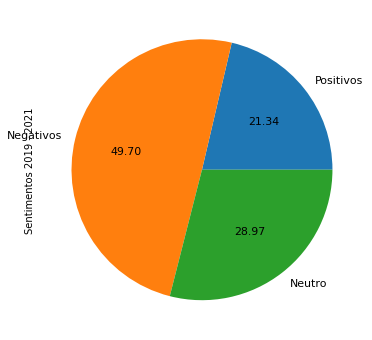

In [19]:
sentiments = ['Positivos', 'Negativos', 'Neutro']
percents = [len(pos_tweets), len(neg_tweets), len(neut_tweets)]

pie_chart = pd.Series(percents, index=sentiments, name='Sentimentos 2019 - 2021')

# pie chart with sentiments
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [20]:
raiva_tweets = get_value_percent_emotions(tweet_df_processed, 'Raiva', 0 )
antecipacao_tweets = get_value_percent_emotions(tweet_df_processed, 'Antecipação', 0 )
nojo_tweet = get_value_percent_emotions(tweet_df_processed, 'Nojo', 0 )
medo_tweets = get_value_percent_emotions(tweet_df_processed, 'Medo', 0 )
alegria_tweets = get_value_percent_emotions(tweet_df_processed, 'Alegria', 0 )
tristeza_tweets = get_value_percent_emotions(tweet_df_processed, 'Tristeza', 0 )
surpesa_tweets = get_value_percent_emotions(tweet_df_processed, 'Surpesa', 0 )
confianca_tweets = get_value_percent_emotions(tweet_df_processed, 'Confiança', 0 )


print("Total de Tweets contendo Raiva: {}% de {} tweets".format(raiva_tweets, len(tweet_df_processed['tweet'])))
print("Total de Tweets contendo Antecipação: {}% de {}tweets".format(antecipacao_tweets, len(tweet_df_processed['tweet'])))
print("Total de Tweets contendo Nojo: {}% de {} tweets".format(nojo_tweet, len(tweet_df_processed['tweet'])))
print("Total de Tweets contendo Medo: {}% de {} tweets".format(medo_tweets, len(tweet_df_processed['tweet'])))
print("Total de Tweets contendo Alegria: {}% de {} tweets".format(alegria_tweets, len(tweet_df_processed['tweet'])))
print("Total de Tweets contendo Tristeza: {}% de {} tweets".format(tristeza_tweets, len(tweet_df_processed['tweet'])))
print("Total de Tweets contendo Surpesa: {}% de {} tweets".format(surpesa_tweets, len(tweet_df_processed['tweet'])))
print("Total de Tweets contendo Confiança: {}% de {} tweets".format(confianca_tweets, len(tweet_df_processed['tweet'])))

Total de Tweets contendo Raiva: 45.38875046051094% de 252437 tweets
Total de Tweets contendo Antecipação: 16.133134207742923% de 252437tweets
Total de Tweets contendo Nojo: 19.43375971034357% de 252437 tweets
Total de Tweets contendo Medo: 30.859184667857726% de 252437 tweets
Total de Tweets contendo Alegria: 10.926686658453397% de 252437 tweets
Total de Tweets contendo Tristeza: 24.876305771340967% de 252437 tweets
Total de Tweets contendo Surpesa: 12.141643261487024% de 252437 tweets
Total de Tweets contendo Confiança: 30.13464745659313% de 252437 tweets


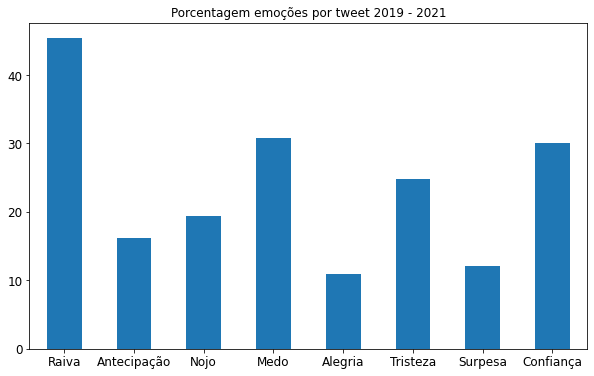

In [21]:
sentiments = ['Raiva', 'Antecipação', 'Nojo', "Medo", "Alegria","Tristeza", "Surpesa", "Confiança"]
percents = [raiva_tweets, antecipacao_tweets, nojo_tweet, medo_tweets, alegria_tweets, tristeza_tweets, surpesa_tweets, confianca_tweets]

pie_chart = pd.Series(percents, index=sentiments, name='Emoções 2019 - 2021')

pie_chart.plot.bar(fontsize=12, figsize=(10, 6), rot=0, title='Porcentagem emoções por tweet 2019 - 2021');

In [22]:
data = tweet_df_processed

In [23]:
file_name = "wordcloud_general"

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vinic\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


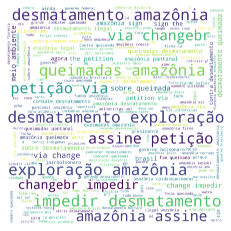

In [24]:
#world cloud
nltk.download('stopwords')
stopwordx = nltk.corpus.stopwords.words('portuguese')

text_tweet_word = " ".join(clean_tweet(str(review)) for review in tweet_df_processed["tweet"])
wordcloud = wc.WordCloud(min_font_size=10, 
               max_font_size=300, 
               background_color='white', 
               mode="RGB",
               stopwords=stopwordx,
               width=4000, 
               height=4000,
               normalize_plurals= True).generate(text_tweet_word)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig(file_name+'.png', dpi=300)
plt.show()

In [25]:
data['date'] = pd.to_datetime(data['date']).apply(lambda x: x.date())

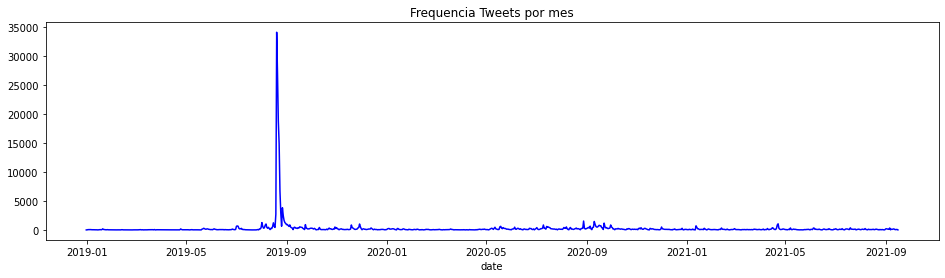

In [26]:
#Tweets per Day
# data = tweet_df_processed

# data['date'] = pd.to_datetime(data['date']).apply(lambda x: x.date())

tpd = pd.Series(data['date'].value_counts(), index=data['date'])
tpd.plot(figsize=(16,4), color='b', title="Frequencia Tweets por mes");

------------------------------------ Maior 2020 ----------------------------------------
* https://g1.globo.com/natureza/noticia/2020/06/12/mesmo-com-queda-em-maio-alertas-de-desmatamento-na-amazonia-indicam-que-temporada-pode-ter-devastacao-maior-que-a-anterior.ghtml

* https://agenciabrasil.ebc.com.br/politica/noticia/2020-03/vice-presidente-participa-da-1a-reuniao-do-conselho-da-amazonia
    
* https://www.dw.com/pt-br/bolsonaro-autoriza-envio-de-tropas-para-combater-destrui%C3%A7%C3%A3o-da-amaz%C3%B4nia/a-53364232

* https://revistagloborural.globo.com/Noticias/Sustentabilidade/noticia/2020/05/bolsonaro-autoriza-atuacao-das-forcas-armadas-contra-o-desmatamento-na-amazonia.html

* https://g1.globo.com/natureza/noticia/2020/05/08/alertas-de-desmatamento-na-amazonia-crescem-em-abril-mostram-dados-do-inpe.ghtml

* https://www.change.org/p/demiss%C3%A3o-do-ministro-ricardo-salles-por-apoiar-a-destrui%C3%A7%C3%A3o-da-amaz%C3%B4nia-e-do-meio-ambiente

------ agosto 2019 ----------- 
* https://www.greenpeace.org/brasil/blog/amazonia-sob-ataque-queimadas-tem-aumento-de-145-em-2019/

* https://www.camara.leg.br/noticias/701734-queimadas-na-amazonia-provocaram-duas-mil-internacoes-no-sus-em-2019-aponta-relatorio/

            Word  Frequency
0       amazônia     248881
1   desmatamento     171649
2      queimadas     105069
3            via      66997
4     exploração      58727
5        impedir      58193
6        petição      52174
7         assine      51804
8       changebr      48129
9      bolsonaro      28033
10         sobre      23919
11       governo      21759
12        brasil      21636
13           pra      15336
14      amazonia      12630
15             q      12477
16        contra      12472
17          anos      12209
18           vai      11613
19    presidente      11611
20           diz      10784
21      pantanal      10610
22         maior      10466
23           ano      10260
24          meio       9349


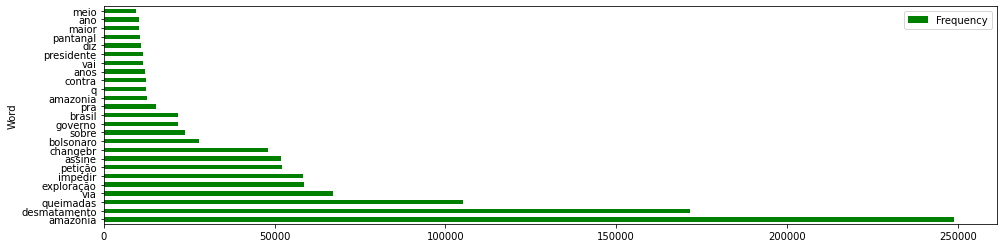

In [27]:
p = Counter(" ".join(clean_tweet(str(review)) for review in data["tweet"]).split()).most_common(25)
rslt = pd.DataFrame(p, columns=['Word', 'Frequency'])
print(rslt)
rslt.plot.barh(x="Word", figsize=(16,4), color='g');

               User  Frequency
0          proindio        851
1          gojammaj        464
2     laecioalencar        443
3           faconti        419
4           vonivar        386
5       vanecosta10        339
6       aimcmoreira        324
7     climainfonews        324
8     bananinhadudu        318
9   lucianosresende        315
10        ecodebate        280
11       wwf_brasil        267
12    informetrica1        254
13     greenpeacebr        252
14   socioambiental        251
15      pedromottab        245
16    paulogbarreto        235
17           imazon        232
18       niltotatto        232
19         ecyclebr        205


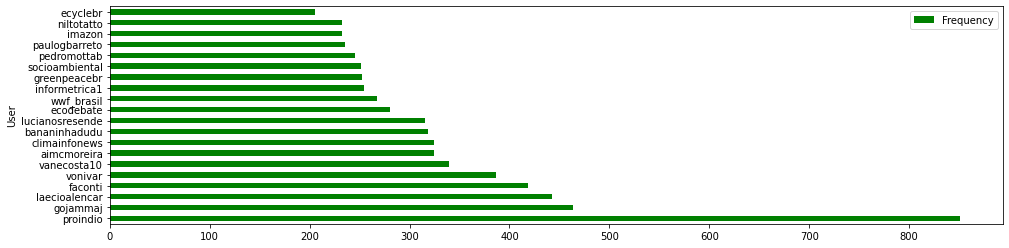

In [28]:
p = Counter(" ".join(str(user) for user in data["username"]).split()).most_common(20)
rslt = pd.DataFrame(p, columns=['User', 'Frequency'])
print(rslt)
rslt.plot.barh(x="User", figsize=(16,4), color='g');

In [29]:
# plt.savefig(file+"_series.png")

In [30]:
COLOR_MAP = { # color blind safe scheme
    "positive": "#006E03",
    "neutral": "#888888",
    "negative": "#DB011C"
}

MARKER_MAP = {
    "positive": "o",
    "neutral": "s",
    "negative": "^"
}

In [31]:
df = data.sort_values('date', ascending=True)

In [32]:
df["month"] = pd.to_datetime(df['date']).dt.month
df["year"] = pd.to_datetime(df['date']).dt.year
df["reference_time"] = pd.to_datetime([f'{y}-{m}-01' for y, m in zip(df.year, df.month)])

df = df[df["year"] > 2018]

In [33]:
grouped_df = df.groupby(['year', 'month', 'Sentiment']).size().unstack(fill_value=0)

grouped_df["sum"] = grouped_df[-1] + grouped_df[0] + grouped_df[1]

grouped_df["percent_pos"] = (grouped_df[1] / grouped_df["sum"]) * 100
grouped_df["percent_neg"] = (grouped_df[-1] / grouped_df["sum"]) * 100
grouped_df["percent_neu"] = (grouped_df[0] / grouped_df["sum"]) * 100

# grouped_df

In [34]:
import itertools
months = ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"]
month_combination = list(itertools.product(range(2019, 2022), months))

grouped_df["reference_time"] = [f"{month} {year}" for year, month in month_combination][:-3]

In [35]:
pos_df = pd.DataFrame(grouped_df.loc[2019]["percent_pos"])
neg_df = pd.DataFrame(grouped_df.loc[2019]["percent_neg"])
neu_df = pd.DataFrame(grouped_df.loc[2019]["percent_neu"])

In [36]:
positive_general_data = pd.DataFrame(grouped_df["percent_pos"])
positive_general_data.loc[2019]

,percent_pos
month,
1,27.233677
2,32.371795
3,18.311688
4,33.055556
5,23.296808
6,25.110865
7,29.941396
8,15.214652
9,26.467296


In [37]:
test_df = pd.DataFrame(grouped_df[["percent_neg", "percent_neu", "percent_pos", "reference_time"]])

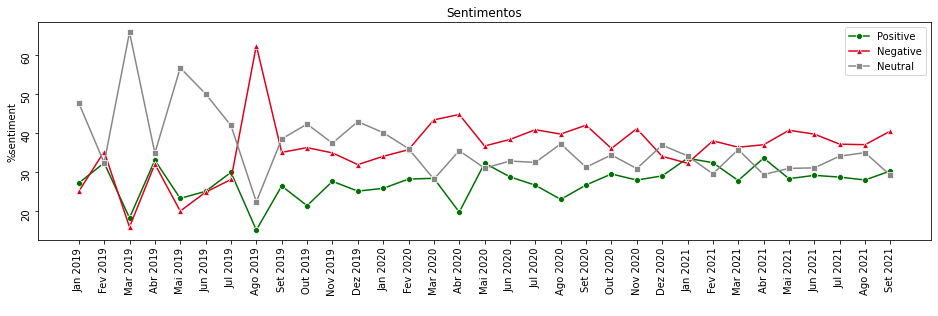

In [38]:
fig, ax = plt.subplots(figsize=(16,4))

ax.set_title(f'Sentimentos')
ax.set_ylabel(f'%sentiment')
ax.set_xlabel(' ')

ax.tick_params(labelrotation=90)

sns.lineplot(x='reference_time', y='percent_pos', data=test_df, marker=MARKER_MAP["positive"], ax=ax, label="Positive", color=COLOR_MAP["positive"])
# ax2 = ax.twinx()
sns.lineplot(x='reference_time', y='percent_neg', data=test_df, marker=MARKER_MAP["negative"], ax=ax, label="Negative", color=COLOR_MAP["negative"])
# ax3 = ax.twinx()
sns.lineplot(x='reference_time', y='percent_neu', data=test_df, ax=ax, marker=MARKER_MAP["neutral"], label="Neutral", color=COLOR_MAP["neutral"])
# # ax.set_ylim([12, 70])

# plt.savefig('sentiments_time_series.png')
plt.show()

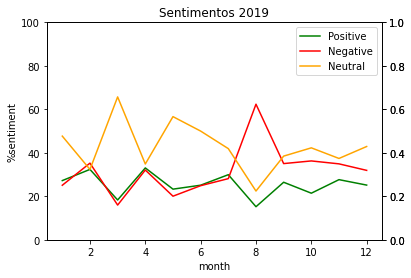

In [39]:
fig, ax = plt.subplots()

ax.set_title('Sentimentos 2019')
ax.set_ylabel(f'%sentiment')

sns.lineplot(x='month', y='percent_pos', data=pos_df, ax=ax, label="Positive", color="green")
ax2 = ax.twinx()
sns.lineplot(x='month', y='percent_neg', data=neg_df, ax=ax, label="Negative", color="red")
ax3 = ax.twinx()
sns.lineplot(x='month', y='percent_neu', data=neu_df, ax=ax, label="Neutral", color="orange")
ax.legend()
ax.set_ylim([0,100])

plt.show()

In [40]:
pos_df = pd.DataFrame(grouped_df.loc[2020]["percent_pos"])
neg_df = pd.DataFrame(grouped_df.loc[2020]["percent_neg"])
neu_df = pd.DataFrame(grouped_df.loc[2020]["percent_neu"])

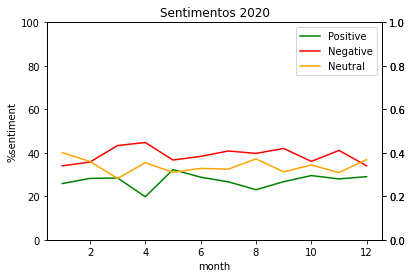

In [41]:
fig, ax = plt.subplots()

ax.set_title('Sentimentos 2020')
ax.set_ylabel(f'%sentiment')

sns.lineplot(x='month', y='percent_pos', data=pos_df, ax=ax, label="Positive", color="green")
ax2 = ax.twinx()
sns.lineplot(x='month', y='percent_neg', data=neg_df, ax=ax, label="Negative", color="red")
ax3 = ax.twinx()
sns.lineplot(x='month', y='percent_neu', data=neu_df, ax=ax, label="Neutral", color="orange")
ax.legend()
ax.set_ylim([0,100])

plt.show()

In [42]:
pos_df = pd.DataFrame(grouped_df.loc[2021]["percent_pos"])
neg_df = pd.DataFrame(grouped_df.loc[2021]["percent_neg"])
neu_df = pd.DataFrame(grouped_df.loc[2021]["percent_neu"])

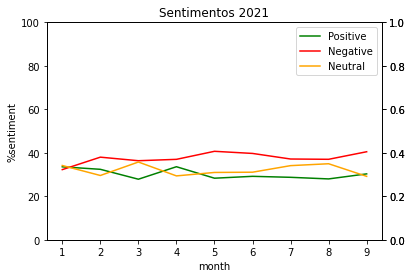

In [43]:
fig, ax = plt.subplots()

ax.set_title('Sentimentos 2021')
ax.set_ylabel(f'%sentiment')

sns.lineplot(x='month', y='percent_pos', data=pos_df, ax=ax, label="Positive", color="green")
ax2 = ax.twinx()
sns.lineplot(x='month', y='percent_neg', data=neg_df, ax=ax, label="Negative", color="red")
ax3 = ax.twinx()
sns.lineplot(x='month', y='percent_neu', data=neu_df, ax=ax, label="Neutral", color="orange")
ax.legend()
ax.set_ylim([0,100])

plt.show()

In [103]:
top_tweets = data[["tweet", "retweets_count"]]
for tweet in top_tweets.sort_values("retweets_count", ascending=False).head(5)["tweet"]:
    print(f"TWEET: {tweet}")

TWEET: Apesar de não ser alvo da mesma histeria ambiental observada durante a época de queimadas na #Amazônia em 2019, os incêndios que assolam a #Austrália são quase 6 vezes maiores.   https://t.co/DyEJspoeFN
TWEET: A Amazônia sofre o maior ataque orquestrado por organizações internacionais da história. As queimadas são o pano de fundo para o real interesse dos que querem a biodiversidade e a riqueza mineral da região. É triste ver brasileiros a favor Macron e contra o Brasil. #MacronLies
TWEET: BH amanheceu doente pela fumaça dos incêndios em Nova Lima, Sabará e na Serra da Moeda. Quando falo da urgência da #GreveGlobalPeloClima, não é só sobre a Amazônia. Contra o desmatamento q asfixia o Brasil, amanhã estaremos nas ruas! Na Praça Sete, às 17h.  https://t.co/RBSJhqnF9X
TWEET: O Brasil é líder em desmatamento de florestas. Em 2018, foram 1,3 milhão de hectares. Entre agosto/2018 e março/2019, a Amazônia perdeu 1.974 km², um aumento de 24% em comparação com o mesmo período anterior. 

In [104]:
top_tweets.sort_values("retweets_count", ascending=False).head(5)

,tweet,retweets_count
220652,Apesar de não ser alvo da mesma histeria ambie...,995
170052,A Amazônia sofre o maior ataque orquestrado po...,99
96517,BH amanheceu doente pela fumaça dos incêndios ...,99
6573,O Brasil é líder em desmatamento de florestas....,99
132706,"O MPF pediu, pela 2ªvez, o afastamento de Sall...",99


# Pico Julho / setembro 2019 ------------------ 35 mil tweets sobre o tema

In [44]:
# ponto anormal
# ponto_pico_jul_agos_19 = data.loc['2019-08-01':'2019-09-30']
start_date = "2019/08/01"
end_date = "2019/09/30"

start_date_form =  datetime.strptime(start_date, '%Y/%m/%d').date()
before_end_date_form = datetime.strptime(end_date, '%Y/%m/%d').date()

# print(f"after: {after_start_date} before {before_end_date}")

# ponto_pico_jul_agos_19 = data.loc[before_end_date:after_start_date]
ponto_pico_jul_agos_19 = data[(data['date'] > start_date_form) & (data['date'] < before_end_date_form)]

In [45]:
pos_sentiment_percent_ja19 = get_value_percent(ponto_pico_jul_agos_19, "Sentiment", 1)
neg_sentiment_percent_ja19 = get_value_percent(ponto_pico_jul_agos_19, "Sentiment", -1)
neut_sentiment_percent_ja19 = get_value_percent(ponto_pico_jul_agos_19, "Sentiment", 0)

print(f"Porcentagem de Tweets Positivos: {pos_sentiment_percent_ja19}%")
print(f"Porcentagem de Tweets Negativos: {neg_sentiment_percent_ja19}%")
print(f"Porcentagem de Tweets Neutros: {neut_sentiment_percent_ja19}%")

Porcentagem de Tweets Positivos: 16.16212266651385%
Porcentagem de Tweets Negativos: 60.01948451983553%
Porcentagem de Tweets Neutros: 23.818392813650625%


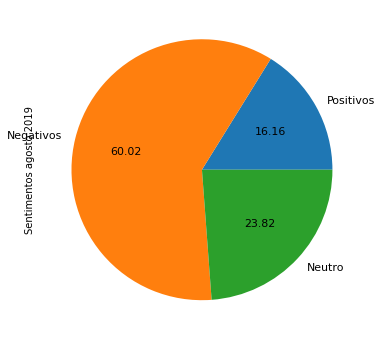

In [46]:
sentiments = ['Positivos', 'Negativos', 'Neutro']
percents = [pos_sentiment_percent_ja19, neg_sentiment_percent_ja19, neut_sentiment_percent_ja19]

pie_chart = pd.Series(percents, index=sentiments, name='Sentimentos agosto 2019')

# pie chart with sentiments
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

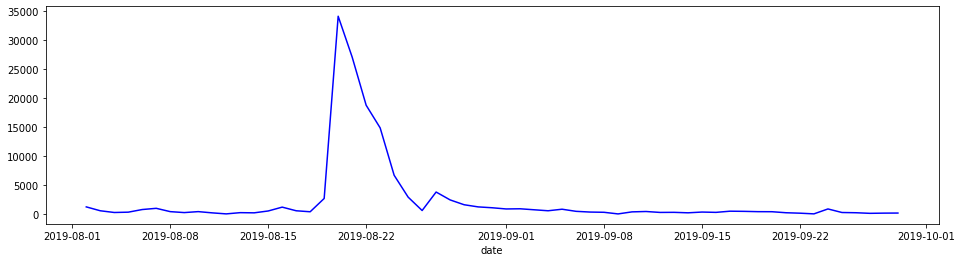

In [47]:
# ponto_pico_jul_agos_19['date'] = pd.to_datetime(ponto_pico_jul_agos_19['date']).apply(lambda x: x.date())

tpd = pd.Series(ponto_pico_jul_agos_19['date'].value_counts(), index=ponto_pico_jul_agos_19['date'])
tpd.plot(figsize=(16,4), color='b');

### Alguma noticias
    
* https://www.greenpeace.org/brasil/blog/amazonia-sob-ataque-queimadas-tem-aumento-de-145-em-2019/

* https://www.camara.leg.br/noticias/701734-queimadas-na-amazonia-provocaram-duas-mil-internacoes-no-sus-em-2019-aponta-relatorio/

* https://www.greenpeace.org/international/act/stand-with-the-guardians-of-the-amazon/

In [48]:
august_19_file = "word_cloud_aug_19"

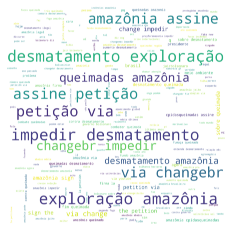

In [49]:
text_tweet_word = " ".join(clean_tweet(str(review)) for review in ponto_pico_jul_agos_19["tweet"])
wordcloud = wc.WordCloud(min_font_size=10, 
               max_font_size=300, 
               background_color='white', 
               mode="RGB",
               stopwords=stopwordx,
               width=4000, 
               height=4000,
               normalize_plurals= True).generate(text_tweet_word)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig(august_19_file+'.png', dpi=300)
plt.show()

In [50]:
raiva_tweets_aug19 = get_value_percent_emotions(ponto_pico_jul_agos_19, 'Raiva', 0 )
antecipacao_tweets_aug19 = get_value_percent_emotions(ponto_pico_jul_agos_19, 'Antecipação', 0 )
nojo_tweets_aug19 = get_value_percent_emotions(ponto_pico_jul_agos_19, 'Nojo', 0 )
medo_tweets_aug19 = get_value_percent_emotions(ponto_pico_jul_agos_19, 'Medo', 0 )
alegria_tweets_aug19 = get_value_percent_emotions(ponto_pico_jul_agos_19, 'Alegria', 0 )
tristeza_tweets_aug19 = get_value_percent_emotions(ponto_pico_jul_agos_19, 'Tristeza', 0 )
surpesa_tweets_aug19 = get_value_percent_emotions(ponto_pico_jul_agos_19, 'Surpesa', 0 )
confianca_tweets_aug19 = get_value_percent_emotions(ponto_pico_jul_agos_19, 'Confiança', 0 )


print("Total de Tweets contendo Raiva: {}% de {} tweets".format(raiva_tweets_aug19, len(ponto_pico_jul_agos_19['tweet'])))
print("Total de Tweets contendo Antecipação: {}% de {}tweets".format(antecipacao_tweets_aug19, len(ponto_pico_jul_agos_19['tweet'])))
print("Total de Tweets contendo Nojo: {}% de {} tweets".format(nojo_tweets_aug19, len(ponto_pico_jul_agos_19['tweet'])))
print("Total de Tweets contendo Medo: {}% de {} tweets".format(medo_tweets_aug19, len(ponto_pico_jul_agos_19['tweet'])))
print("Total de Tweets contendo Alegria: {}% de {} tweets".format(alegria_tweets_aug19, len(ponto_pico_jul_agos_19['tweet'])))
print("Total de Tweets contendo Tristeza: {}% de {} tweets".format(tristeza_tweets_aug19, len(ponto_pico_jul_agos_19['tweet'])))
print("Total de Tweets contendo Surpesa: {}% de {} tweets".format(surpesa_tweets_aug19, len(ponto_pico_jul_agos_19['tweet'])))
print("Total de Tweets contendo Confiança: {}% de {} tweets".format(confianca_tweets_aug19, len(ponto_pico_jul_agos_19['tweet'])))

Total de Tweets contendo Raiva: 56.81170217338357% de 139598 tweets
Total de Tweets contendo Antecipação: 11.658476482471096% de 139598tweets
Total de Tweets contendo Nojo: 13.372684422412927% de 139598 tweets
Total de Tweets contendo Medo: 22.26034756944942% de 139598 tweets
Total de Tweets contendo Alegria: 9.068897835212539% de 139598 tweets
Total de Tweets contendo Tristeza: 18.30255447785785% de 139598 tweets
Total de Tweets contendo Surpesa: 7.979340678233212% de 139598 tweets
Total de Tweets contendo Confiança: 23.1686700382527% de 139598 tweets


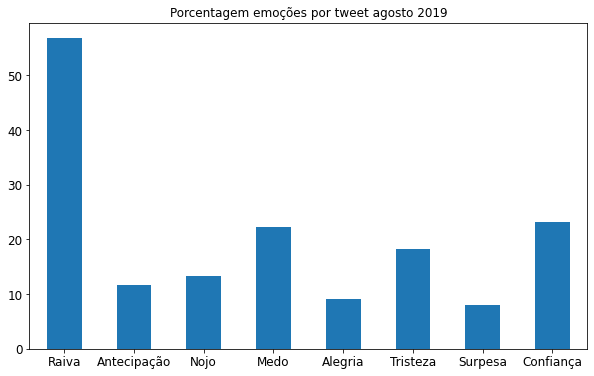

In [51]:
sentiments = ['Raiva', 'Antecipação', 'Nojo', "Medo", "Alegria","Tristeza", "Surpesa", "Confiança"]
percents = [raiva_tweets_aug19, antecipacao_tweets_aug19, nojo_tweets_aug19, medo_tweets_aug19, alegria_tweets_aug19, tristeza_tweets_aug19, surpesa_tweets_aug19, confianca_tweets_aug19]

pie_chart = pd.Series(percents, index=sentiments, name='Emoções agosto 2019')

# pie chart with sentiments
pie_chart.plot.bar(fontsize=12, figsize=(10, 6), rot=0, title='Porcentagem emoções por tweet agosto 2019');

            Word  Frequency
0       amazônia     138263
1   desmatamento      92177
2            via      60357
3      queimadas      57267
4     exploração      56678
5        impedir      56396
6        petição      50638
7         assine      50339
8       changebr      46784
9      bolsonaro      13891
10         sobre      12341
11       governo       9223
12        change       8963
13        brasil       8226
14           pra       7549
15    presidente       6476
16             q       6285
17           the       5749
18      amazonia       5716
19        contra       5399


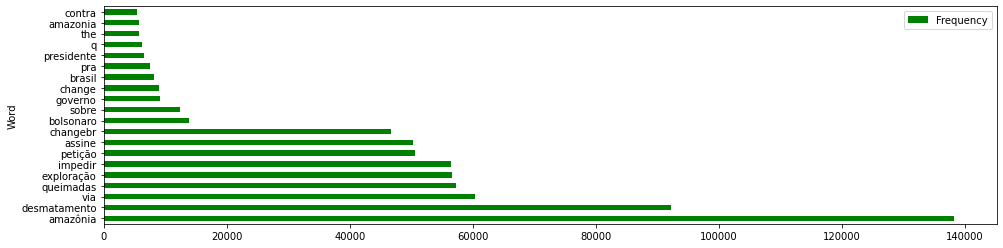

In [52]:
p = Counter(" ".join(clean_tweet(str(review)) for review in ponto_pico_jul_agos_19["tweet"]).split()).most_common(20)
rslt = pd.DataFrame(p, columns=['Word', 'Frequency'])
print(rslt)
rslt.plot.barh(x="Word", figsize=(16,4), color='g');

               User  Frequency
0   lucianosresende        306
1          gojammaj        204
2           faconti        138
3        wwf_brasil        123
4     climainfonews        118
5          proindio        116
6   grupodobemestar        116
7           vonivar        109
8       aimcmoreira        107
9       vanecosta10         93
10       dcm_online         92
11     thinkfloyd61         88
12   jbellosonhador         82
13       epopeiaorg         75
14        bbcbrasil         72
15      uolnoticias         68
16       g1natureza         68
17       migueljac1         63
18       marioscand         60
19        flavitorg         60


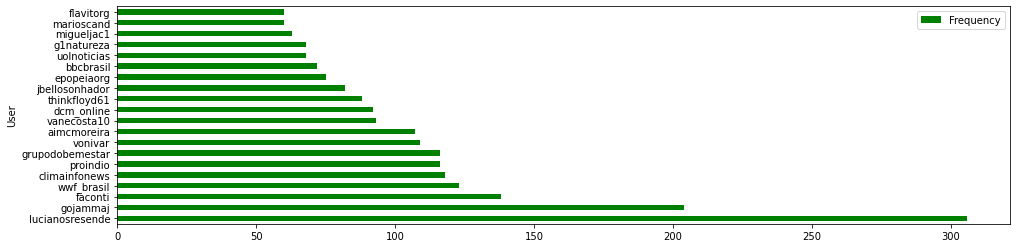

In [53]:
p = Counter(" ".join(str(user) for user in ponto_pico_jul_agos_19["username"]).split()).most_common(20)
rslt = pd.DataFrame(p, columns=['User', 'Frequency'])
print(rslt)
rslt.plot.barh(x="User", figsize=(16,4), color='g');

In [102]:
top_tweets = ponto_pico_jul_agos_19[["tweet", "retweets_count"]]
for tweet in top_tweets.sort_values("retweets_count", ascending=False).head(5)["tweet"]:
    print(f"TWEET: {tweet}")

TWEET: BH amanheceu doente pela fumaça dos incêndios em Nova Lima, Sabará e na Serra da Moeda. Quando falo da urgência da #GreveGlobalPeloClima, não é só sobre a Amazônia. Contra o desmatamento q asfixia o Brasil, amanhã estaremos nas ruas! Na Praça Sete, às 17h.  https://t.co/RBSJhqnF9X
TWEET: Bolsonaro sugeriu que as mesmas pessoas que têm filmado queimadas na Amazônia estariam por trás dos incêndios.   https://t.co/D3jmC4ML4F
TWEET: A esquerda não entendeu que perdeu às eleições, em oito meses de governo, deixaram estragos com ações terroristas:  1) Lula livre; 2) educação; 3) queimadas na Amazônia.  Qual será a próxima?
TWEET: Quem riscou o fósforo? As queimadas na Amazônia já estão no centro de uma crise internacional e Bolsonaro é responsável, sim. O governo pode se esquivar o quanto quiser, mas há fuligem nas mãos do presidente e seus ministros. Como? Segura que vem thread.  https://t.co/LCkQaWeQ8d
TWEET: A Amazônia sofre o maior ataque orquestrado por organizações internacionai

* Veiculos de comunicação oficial *
* 4     climainfonews        118
* 14        bbcbrasil         72
* 15      uolnoticias         68
* 16       g1natureza         68
* 25              uol         51
* 29          estadao         48

# Pico Agosto setembro 2020 

In [54]:
# ponto anormal
# ponto_pico_jul_agos_19 = data.loc['2019-08-01':'2019-09-30']
start_date = "2020/08/01"
end_date = "2020/09/30"

start_date_form =  datetime.strptime(start_date, '%Y/%m/%d').date()
before_end_date_form = datetime.strptime(end_date, '%Y/%m/%d').date()

# print(f"after: {after_start_date} before {before_end_date}")

# ponto_pico_jul_agos_19 = data.loc[before_end_date:after_start_date]
ponto_pico_sept_20 = data[(data['date'] > start_date_form) & (data['date'] < before_end_date_form)]

In [55]:

pos_sentiment_percent_sept20 = get_value_percent(ponto_pico_sept_20, "Sentiment", 1)
neg_sentiment_percent_sept20 = get_value_percent(ponto_pico_sept_20, "Sentiment", -1)
neu_sentiment_percent_sept20 = get_value_percent(ponto_pico_sept_20, "Sentiment", 0)

print(f"Porcentagem de Tweets Positivos: {pos_sentiment_percent_sept20}%")
print(f"Porcentagem de Tweets Negativos: {neg_sentiment_percent_sept20}%")
print(f"Porcentagem de Tweets Neutros: {neu_sentiment_percent_sept20}%")

Porcentagem de Tweets Positivos: 25.11176337773764%
Porcentagem de Tweets Negativos: 41.68435312711673%
Porcentagem de Tweets Neutros: 33.20388349514563%


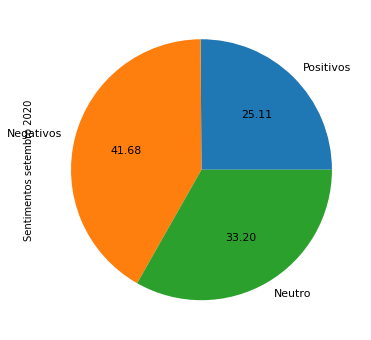

In [56]:
sentiments = ['Positivos', 'Negativos', 'Neutro']
percents = [pos_sentiment_percent_sept20, neg_sentiment_percent_sept20, neu_sentiment_percent_sept20]

pie_chart = pd.Series(percents, index=sentiments, name='Sentimentos setembro 2020')

# pie chart with sentiments
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

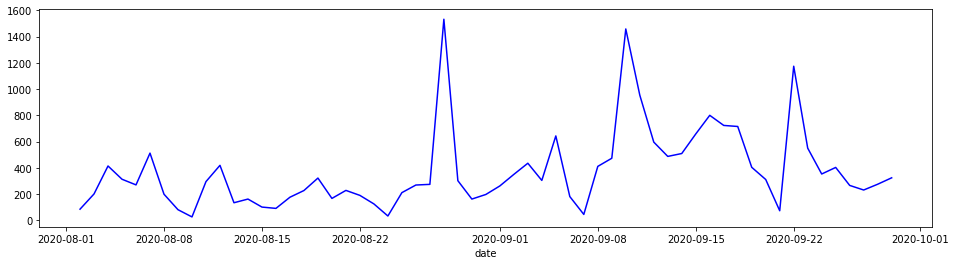

In [57]:
# ponto_pico_jul_agos_19['date'] = pd.to_datetime(ponto_pico_jul_agos_19['date']).apply(lambda x: x.date())

tpd = pd.Series(ponto_pico_sept_20['date'].value_counts(), index=ponto_pico_sept_20['date'])
tpd.plot(figsize=(16,4), color='b');

In [58]:
raiva_tweets_sept20 = get_value_percent_emotions(ponto_pico_sept_20, 'Raiva', 0 )
antecipacao_tweets_sept20 = get_value_percent_emotions(ponto_pico_sept_20, 'Antecipação', 0 )
nojo_tweets_sept20 = get_value_percent_emotions(ponto_pico_sept_20, 'Nojo', 0 )
medo_tweets_sept20 = get_value_percent_emotions(ponto_pico_sept_20, 'Medo', 0 )
alegria_tweets_sept20 = get_value_percent_emotions(ponto_pico_sept_20, 'Alegria', 0 )
tristeza_tweets_sept20 = get_value_percent_emotions(ponto_pico_sept_20, 'Tristeza', 0 )
surpesa_tweets_sept20 = get_value_percent_emotions(ponto_pico_sept_20, 'Surpesa', 0 )
confianca_tweets_sept20 = get_value_percent_emotions(ponto_pico_sept_20, 'Confiança', 0 )


print("Total de Tweets contendo Raiva: {}% de {} tweets".format(raiva_tweets_sept20, len(ponto_pico_sept_20['tweet'])))
print("Total de Tweets contendo Antecipação: {}% de {}tweets".format(antecipacao_tweets_sept20, len(ponto_pico_sept_20['tweet'])))
print("Total de Tweets contendo Nojo: {}% de {} tweets".format(nojo_tweets_sept20, len(ponto_pico_sept_20['tweet'])))
print("Total de Tweets contendo Medo: {}% de {} tweets".format(medo_tweets_sept20, len(ponto_pico_sept_20['tweet'])))
print("Total de Tweets contendo Alegria: {}% de {} tweets".format(alegria_tweets_sept20, len(ponto_pico_sept_20['tweet'])))
print("Total de Tweets contendo Tristeza: {}% de {} tweets".format(tristeza_tweets_sept20, len(ponto_pico_sept_20['tweet'])))
print("Total de Tweets contendo Surpesa: {}% de {} tweets".format(surpesa_tweets_sept20, len(ponto_pico_sept_20['tweet'])))
print("Total de Tweets contendo Confiança: {}% de {} tweets".format(confianca_tweets_sept20, len(ponto_pico_sept_20['tweet'])))

Total de Tweets contendo Raiva: 36.06231655001129% de 22145 tweets
Total de Tweets contendo Antecipação: 20.916685482050124% de 22145tweets
Total de Tweets contendo Nojo: 25.436893203883493% de 22145 tweets
Total de Tweets contendo Medo: 44.321517272522016% de 22145 tweets
Total de Tweets contendo Alegria: 14.138631745314969% de 22145 tweets
Total de Tweets contendo Tristeza: 32.90133212914879% de 22145 tweets
Total de Tweets contendo Surpesa: 13.863174531496952% de 22145 tweets
Total de Tweets contendo Confiança: 36.884172499435536% de 22145 tweets


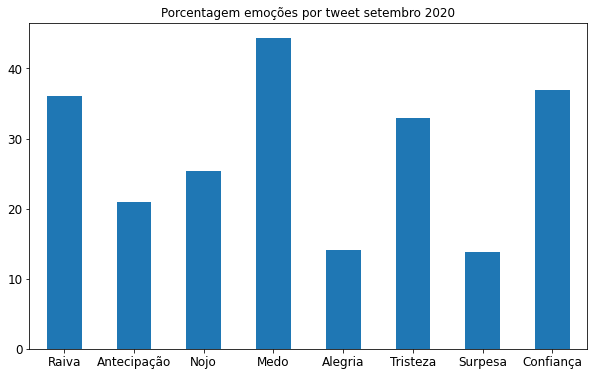

In [59]:
sentiments = ['Raiva', 'Antecipação', 'Nojo', "Medo", "Alegria","Tristeza", "Surpesa", "Confiança"]
percents = [raiva_tweets_sept20, antecipacao_tweets_sept20, nojo_tweets_sept20, medo_tweets_sept20, alegria_tweets_sept20, tristeza_tweets_sept20, surpesa_tweets_sept20, confianca_tweets_sept20]

pie_chart = pd.Series(percents, index=sentiments, name='Emoções setembro 2020')

# pie chart with sentiments
pie_chart.plot.bar(fontsize=12, figsize=(10, 6), rot=0, title='Porcentagem emoções por tweet setembro 2020');

In [60]:
septemb_20_file = "word_cloud_sept_20"

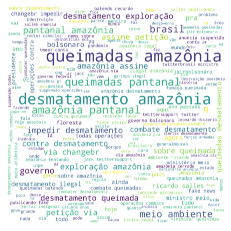

In [61]:
text_tweet_word = " ".join(clean_tweet(str(review)) for review in ponto_pico_sept_20["tweet"])
wordcloud = wc.WordCloud(min_font_size=10, 
               max_font_size=300, 
               background_color='white', 
               mode="RGB",
               stopwords=stopwordx,
               width=4000, 
               height=4000,
               normalize_plurals= True).generate(text_tweet_word)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig(septemb_20_file+'.png', dpi=300)
plt.show()

            Word  Frequency
0       amazônia      21770
1      queimadas      14712
2   desmatamento      11786
3       pantanal       5712
4          sobre       2814
5        governo       2674
6      bolsonaro       2635
7         brasil       2458
8            via       1966
9           meio       1704
10        contra       1703
11           pra       1630
12      ambiente       1580
13        salles       1517
14      amazonia       1517
15       combate       1470
16          fogo       1370
17           ano       1317
18             q       1243
19           diz       1219


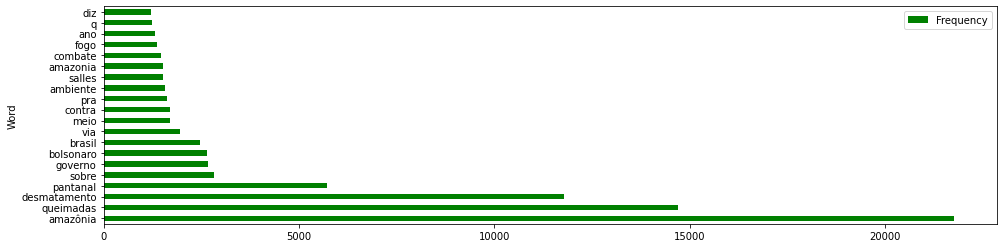

In [62]:
p = Counter(" ".join(clean_tweet(str(review)) for review in ponto_pico_sept_20["tweet"]).split()).most_common(20)
rslt = pd.DataFrame(p, columns=['Word', 'Frequency'])
print(rslt)
rslt.plot.barh(x="Word", figsize=(16,4), color='g');

              User  Frequency
0         proindio        127
1          faconti        103
2       umsabenada         78
3      jrl99699696         68
4    laecioalencar         63
5           _gabge         59
6          vonivar         52
7      vanecosta10         49
8      aimcmoreira         48
9      pedromottab         44
10       ecodebate         44
11          wpsmat         44
12        geladog_         40
13      niltotatto         39
14  peewee91197678         38
15     nobrejorge2         37
16    followsigame         37
17     342amazonia         36
18        energyls         36
19  conexaoplaneta         31


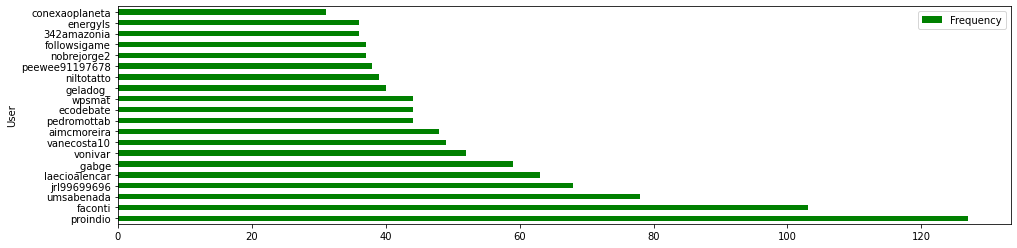

In [63]:
p = Counter(" ".join(str(user) for user in ponto_pico_sept_20["username"]).split()).most_common(20)
rslt = pd.DataFrame(p, columns=['User', 'Frequency'])
print(rslt)
rslt.plot.barh(x="User", figsize=(16,4), color='g');

In [101]:
top_tweets = ponto_pico_sept_20[["tweet", "retweets_count"]]
for tweet in top_tweets.sort_values("retweets_count", ascending=False).head(5)["tweet"]:
    print(f"TWEET: {tweet}")

TWEET: O MPF pediu, pela 2ªvez, o afastamento de Salles por enxergar o risco de que a destruição na Amazônia chegue ao ponto de 'não retorno'. Pela preservação ambiental e por medidas sérias p/ combater o desmatamento, faço coro com este pedido do MPF!#ForaSalles  https://t.co/ZeDk9q2dQm
TWEET: O governo cortou em 58% a verba para contratação de profissionais para prevenção e controle de incêndios florestais entre 2019 e 2020, apesar do aumento das queimadas na Amazônia e no Pantanal.  https://t.co/iHe6pb302A
TWEET: A verdade é que a mídia burguesa colocou a defesa das reformas neoliberais acima das mais de 135 mil mortes por covid, acima das queimadas na Amazônia e no Pantanal, acima das rachadinhas. Com isso a mídia burguesa é hoje o principal cabo eleitoral de bolsonaro.
TWEET: Falando em mico 🐒  Mourão e Salles compartilham vídeo com animal da Mata Atlântica para rebater críticas sobre queimadas na Amazônia | Política | G1  https://t.co/7uzVZAUfJ8
TWEET: A Amazônia teve o segundo p

# Pico abril maio 2021

In [64]:
# ponto anormal
# ponto_pico_jul_agos_19 = data.loc['2019-08-01':'2019-09-30']
start_date = "2021/04/01"
end_date = "2021/05/30"

start_date_form =  datetime.strptime(start_date, '%Y/%m/%d').date()
before_end_date_form = datetime.strptime(end_date, '%Y/%m/%d').date()

# print(f"after: {after_start_date} before {before_end_date}")

# ponto_pico_jul_agos_19 = data.loc[before_end_date:after_start_date]
ponto_pico_may_21 = data[(data['date'] > start_date_form) & (data['date'] < before_end_date_form)]

In [65]:
pos_sentiment_percent_may21 = get_value_percent(ponto_pico_may_21, "Sentiment", 1)
neg_sentiment_percent_may21 = get_value_percent(ponto_pico_may_21, "Sentiment", -1)
neu_sentiment_percent_may21 = get_value_percent(ponto_pico_may_21, "Sentiment", 0)

print(f"Porcentagem de Tweets Positivos: {pos_sentiment_percent_may21}%")
print(f"Porcentagem de Tweets Negativos: {neg_sentiment_percent_may21}%")
print(f"Porcentagem de Tweets Neutros: {neu_sentiment_percent_may21}%")

Porcentagem de Tweets Positivos: 32.3876747658477%
Porcentagem de Tweets Negativos: 37.80371928871997%
Porcentagem de Tweets Neutros: 29.808605945432333%


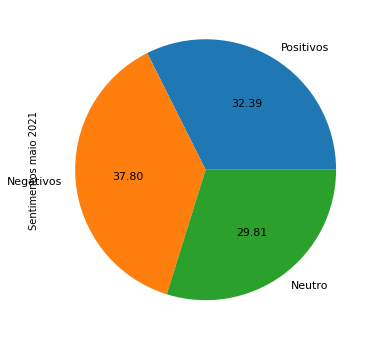

In [66]:
sentiments = ['Positivos', 'Negativos', 'Neutro']
percents = [pos_sentiment_percent_may21, neg_sentiment_percent_may21, neu_sentiment_percent_may21]

pie_chart = pd.Series(percents, index=sentiments, name='Sentimentos maio 2021')

# pie chart with sentiments
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

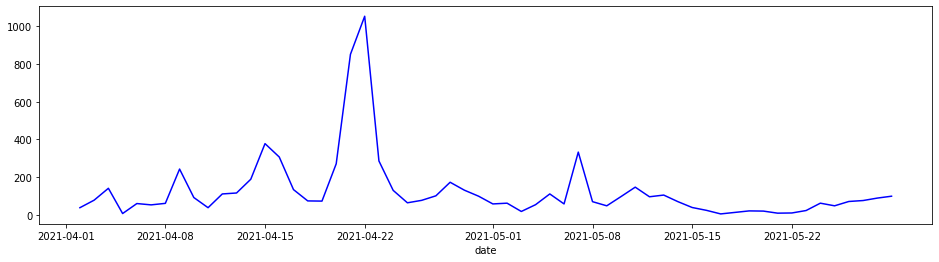

In [67]:
tpd = pd.Series(ponto_pico_may_21['date'].value_counts(), index=ponto_pico_may_21['date'])
tpd.plot(figsize=(16,4), color='b');

In [68]:
raiva_tweets_may21 = get_value_percent_emotions(ponto_pico_may_21, 'Raiva', 0 )
antecipacao_tweets_may21 = get_value_percent_emotions(ponto_pico_may_21, 'Antecipação', 0 )
nojo_tweets_may21 = get_value_percent_emotions(ponto_pico_may_21, 'Nojo', 0 )
medo_tweets_may21 = get_value_percent_emotions(ponto_pico_may_21, 'Medo', 0 )
alegria_tweets_may21 = get_value_percent_emotions(ponto_pico_may_21, 'Alegria', 0 )
tristeza_tweets_may21 = get_value_percent_emotions(ponto_pico_may_21, 'Tristeza', 0 )
surpesa_tweets_may21 = get_value_percent_emotions(ponto_pico_may_21, 'Surpesa', 0 )
confianca_tweets_may21 = get_value_percent_emotions(ponto_pico_may_21, 'Confiança', 0 )


print("Total de Tweets contendo Raiva: {}% de {} tweets".format(raiva_tweets_may21, len(ponto_pico_may_21['tweet'])))
print("Total de Tweets contendo Antecipação: {}% de {}tweets".format(antecipacao_tweets_may21, len(ponto_pico_may_21['tweet'])))
print("Total de Tweets contendo Nojo: {}% de {} tweets".format(nojo_tweets_may21, len(ponto_pico_may_21['tweet'])))
print("Total de Tweets contendo Medo: {}% de {} tweets".format(medo_tweets_may21, len(ponto_pico_may_21['tweet'])))
print("Total de Tweets contendo Alegria: {}% de {} tweets".format(alegria_tweets_may21, len(ponto_pico_may_21['tweet'])))
print("Total de Tweets contendo Tristeza: {}% de {} tweets".format(tristeza_tweets_may21, len(ponto_pico_may_21['tweet'])))
print("Total de Tweets contendo Surpesa: {}% de {} tweets".format(surpesa_tweets_may21, len(ponto_pico_may_21['tweet'])))
print("Total de Tweets contendo Confiança: {}% de {} tweets".format(confianca_tweets_may21, len(ponto_pico_may_21['tweet'])))

Total de Tweets contendo Raiva: 37.817293335143205% de 7367 tweets
Total de Tweets contendo Antecipação: 27.596036378444417% de 7367tweets
Total de Tweets contendo Nojo: 31.803990769648433% de 7367 tweets
Total de Tweets contendo Medo: 48.54079000950183% de 7367 tweets
Total de Tweets contendo Alegria: 17.157594678973805% de 7367 tweets
Total de Tweets contendo Tristeza: 37.152165060404506% de 7367 tweets
Total de Tweets contendo Surpesa: 21.78634450929822% de 7367 tweets
Total de Tweets contendo Confiança: 43.58626306501968% de 7367 tweets


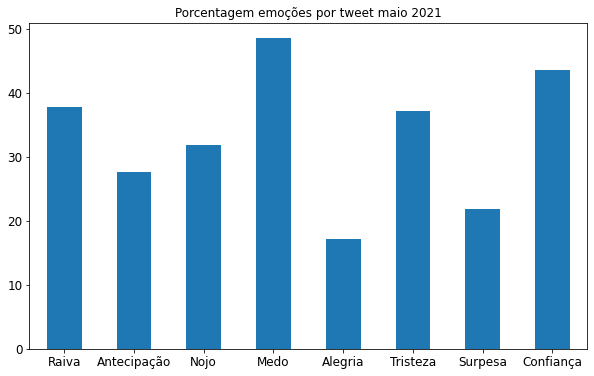

In [69]:
sentiments = ['Raiva', 'Antecipação', 'Nojo', "Medo", "Alegria","Tristeza", "Surpesa", "Confiança"]
percents = [raiva_tweets_may21, antecipacao_tweets_may21, nojo_tweets_may21, medo_tweets_may21, alegria_tweets_may21, tristeza_tweets_may21, surpesa_tweets_may21, confianca_tweets_may21]

pie_chart = pd.Series(percents, index=sentiments, name='Emoções maio 2021')

# pie chart with sentiments
pie_chart.plot.bar(fontsize=12, figsize=(10, 6), rot=0, title='Porcentagem emoções por tweet maio 2021');

In [70]:
may_21_file = "word_cloud_may_21"

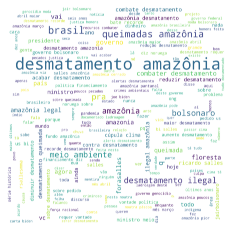

In [71]:
text_tweet_word = " ".join(clean_tweet(str(review)) for review in ponto_pico_may_21["tweet"])
wordcloud = wc.WordCloud(min_font_size=10, 
               max_font_size=300, 
               background_color='white', 
               mode="RGB",
               stopwords=stopwordx,
               width=4000, 
               height=4000,
               normalize_plurals= True).generate(text_tweet_word)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig(may_21_file+'.png', dpi=300)
plt.show()

            Word  Frequency
0       amazônia       7163
1   desmatamento       6762
2      queimadas       1489
3      bolsonaro       1193
4         brasil       1049
5        governo       1025
6         salles        876
7          sobre        740
8          maior        685
9         ilegal        665
10          anos        650
11           vai        611
12           pra        541
13          meio        502
14      amazonia        494
15       recorde        478
16      ambiente        469
17         março        465
18      ministro        427
19           mês        421


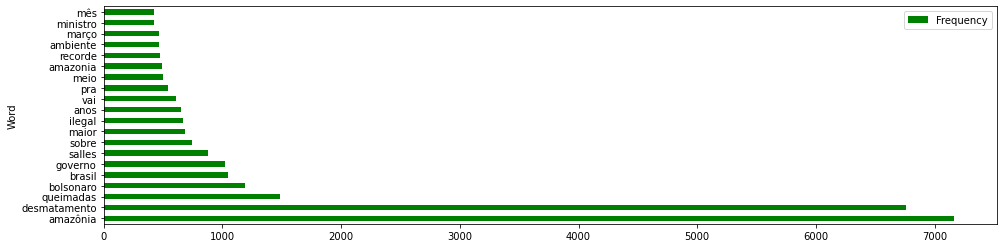

In [72]:
p = Counter(" ".join(clean_tweet(str(review)) for review in ponto_pico_may_21["tweet"]).split()).most_common(20)
rslt = pd.DataFrame(p, columns=['Word', 'Frequency'])
print(rslt)
rslt.plot.barh(x="Word", figsize=(16,4), color='g', rot=0);

               User  Frequency
0        umsabenada         62
1          proindio         54
2   amazoniaobserva         28
3     ipam_amazonia         25
4         infovegbr         24
5    socioambiental         24
6        ptribeirao         23
7            _gabge         22
8       nobrejorge2         20
9       pedromottab         19
10  eduardomorell12         19
11       alexmansur         19
12    laecioalencar         19
13        ecodebate         18
14         gojammaj         16
15    m_cavalcante3         16
16      aimcmoreira         16
17   damatareporter         16
18      vortexbrito         15
19         obsclima         15


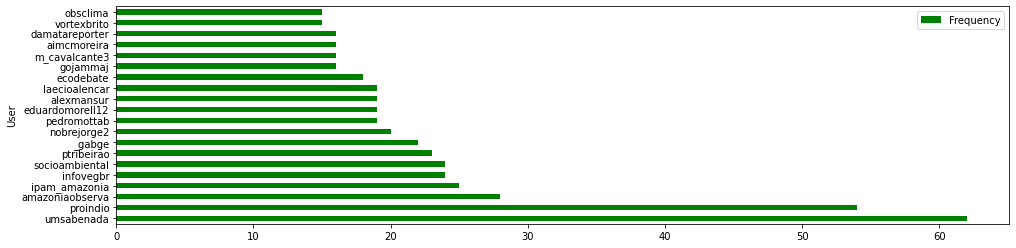

In [73]:
p = Counter(" ".join(str(user) for user in ponto_pico_may_21["username"]).split()).most_common(20)
rslt = pd.DataFrame(p, columns=['User', 'Frequency'])
print(rslt)
rslt.plot.barh(x="User", figsize=(16,4), color='g');

In [100]:
top_tweets = ponto_pico_may_21[["tweet", "retweets_count"]]
for tweet in top_tweets.sort_values("retweets_count", ascending=False).head(5)["tweet"]:
    print(f"TWEET: {tweet}")

TWEET: Latifundiários, donos de gigantescas áreas desmatadas na Amazônia, querem ampliar suas propriedades roubando terras públicas para promover mais desmatamento. Não podemos aceitar! Grilagem é crime e promove a destruição de nossas florestas. #PL510Nao #grilagemnao  https://t.co/gzYcLd1c1r
TWEET: &gt;@fausto_macedo Subprocurador do TCU volta a pedir afastamento de Ricardo Salles, agora por avanço do desmatamento na Amazônia  https://t.co/0pbDXGeGwT
TWEET: A verdade é que um dos maiores picos de desmatamento na Amazônia foi no governo Lula quando a tartaruga era MMA. #FicaSalles  https://t.co/aVsT6FJw1y
TWEET: Curiosidade: em 2017, Anitta gravou um clipe na Amazônia, sendo uma crítica sobre o desmatamento e o extermínio dos animais no local. Necessária!  https://t.co/KWKspS2cI9
TWEET: Amanhã é dia da Cúpula do Clima, onde Salles estará pedindo R$1 bi de países estrangeiros para barrar o desmatamento na Amazônia. Amanhã também é aniversário de um ano da fala "PASSAR A BOIADA", profer

# Pico maio 2020

In [74]:
# ponto anormal
# ponto_pico_jul_agos_19 = data.loc['2019-08-01':'2019-09-30']
start_date = "2020/04/01"
end_date = "2020/05/30"

start_date_form =  datetime.strptime(start_date, '%Y/%m/%d').date()
before_end_date_form = datetime.strptime(end_date, '%Y/%m/%d').date()

# print(f"after: {after_start_date} before {before_end_date}")

# ponto_pico_jul_agos_19 = data.loc[before_end_date:after_start_date]
ponto_pico_may_20 = data[(data['date'] > start_date_form) & (data['date'] < before_end_date_form)]

In [75]:
pos_sentiment_percent_may20 = get_value_percent(ponto_pico_may_20, "Sentiment", 1)
neg_sentiment_percent_may20 = get_value_percent(ponto_pico_may_20, "Sentiment", -1)
neu_sentiment_percent_may20 = get_value_percent(ponto_pico_may_20, "Sentiment", 0)

print(f"Porcentagem de Tweets Positivos: {pos_sentiment_percent_may21}%")
print(f"Porcentagem de Tweets Negativos: {neg_sentiment_percent_may21}%")
print(f"Porcentagem de Tweets Neutros: {neu_sentiment_percent_may21}%")

Porcentagem de Tweets Positivos: 32.3876747658477%
Porcentagem de Tweets Negativos: 37.80371928871997%
Porcentagem de Tweets Neutros: 29.808605945432333%


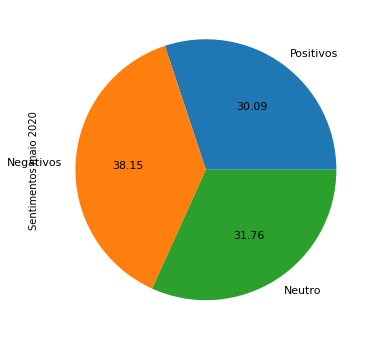

In [76]:
sentiments = ['Positivos', 'Negativos', 'Neutro']
percents = [pos_sentiment_percent_may20, neg_sentiment_percent_may20, neu_sentiment_percent_may20]

pie_chart = pd.Series(percents, index=sentiments, name='Sentimentos maio 2020')

# pie chart with sentiments
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

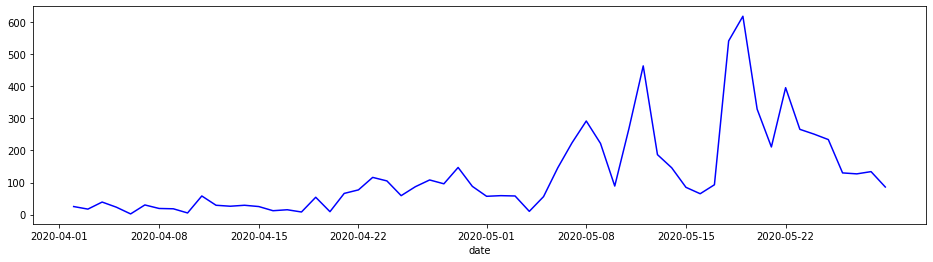

In [77]:
tpd = pd.Series(ponto_pico_may_20['date'].value_counts(), index=ponto_pico_may_20['date'])
tpd.plot(figsize=(16,4), color='b');

In [78]:
raiva_tweets_may20 = get_value_percent_emotions(ponto_pico_may_20, 'Raiva', 0 )
antecipacao_tweets_may20 = get_value_percent_emotions(ponto_pico_may_20, 'Antecipação', 0 )
nojo_tweets_may20 = get_value_percent_emotions(ponto_pico_may_20, 'Nojo', 0 )
medo_tweets_may20 = get_value_percent_emotions(ponto_pico_may_20, 'Medo', 0 )
alegria_tweets_may20 = get_value_percent_emotions(ponto_pico_may_20, 'Alegria', 0 )
tristeza_tweets_may20 = get_value_percent_emotions(ponto_pico_may_20, 'Tristeza', 0 )
surpesa_tweets_may20 = get_value_percent_emotions(ponto_pico_may_20, 'Surpesa', 0 )
confianca_tweets_may20 = get_value_percent_emotions(ponto_pico_may_20, 'Confiança', 0 )


print("Total de Tweets contendo Raiva: {}% de {} tweets".format(raiva_tweets_may20, len(ponto_pico_may_20['tweet'])))
print("Total de Tweets contendo Antecipação: {}% de {}tweets".format(antecipacao_tweets_may20, len(ponto_pico_may_20['tweet'])))
print("Total de Tweets contendo Nojo: {}% de {} tweets".format(nojo_tweets_may20, len(ponto_pico_may_20['tweet'])))
print("Total de Tweets contendo Medo: {}% de {} tweets".format(medo_tweets_may20, len(ponto_pico_may_20['tweet'])))
print("Total de Tweets contendo Alegria: {}% de {} tweets".format(alegria_tweets_may20, len(ponto_pico_may_20['tweet'])))
print("Total de Tweets contendo Tristeza: {}% de {} tweets".format(tristeza_tweets_may20, len(ponto_pico_may_20['tweet'])))
print("Total de Tweets contendo Surpesa: {}% de {} tweets".format(surpesa_tweets_may20, len(ponto_pico_may_20['tweet'])))
print("Total de Tweets contendo Confiança: {}% de {} tweets".format(confianca_tweets_may20, len(ponto_pico_may_20['tweet'])))

Total de Tweets contendo Raiva: 29.50683796104434% de 7239 tweets
Total de Tweets contendo Antecipação: 20.140903439701617% de 7239tweets
Total de Tweets contendo Nojo: 32.532117695814335% de 7239 tweets
Total de Tweets contendo Medo: 44.70230694847355% de 7239 tweets
Total de Tweets contendo Alegria: 11.824837684763088% de 7239 tweets
Total de Tweets contendo Tristeza: 34.97720679651886% de 7239 tweets
Total de Tweets contendo Surpesa: 25.196850393700785% de 7239 tweets
Total de Tweets contendo Confiança: 42.49205691393839% de 7239 tweets


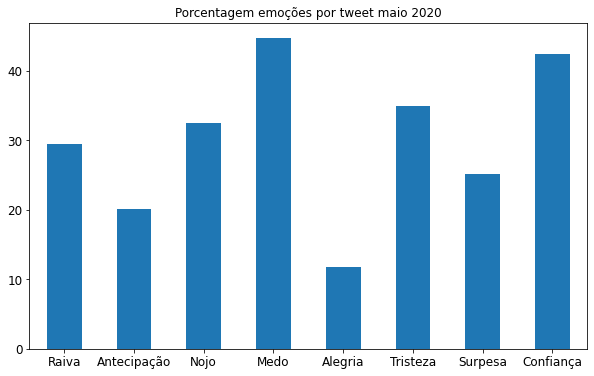

In [79]:
sentiments = ['Raiva', 'Antecipação', 'Nojo', "Medo", "Alegria","Tristeza", "Surpesa", "Confiança"]
percents = [raiva_tweets_may20, antecipacao_tweets_may20, nojo_tweets_may20, medo_tweets_may20, alegria_tweets_may20, tristeza_tweets_may20, surpesa_tweets_may20, confianca_tweets_may20]

pie_chart = pd.Series(percents, index=sentiments, name='Emoções maio 2020')

# pie chart with sentiments
pie_chart.plot.bar(fontsize=12, figsize=(10, 6), rot=0, title='Porcentagem emoções por tweet maio 2020');

In [80]:
may_20_file = "word_cloud_may_20"

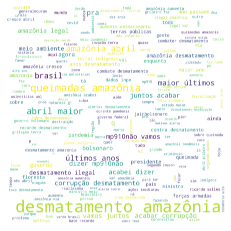

In [81]:
text_tweet_word = " ".join(clean_tweet(str(review)) for review in ponto_pico_may_20["tweet"])
wordcloud = wc.WordCloud(min_font_size=10, 
               max_font_size=300, 
               background_color='white', 
               mode="RGB",
               stopwords=stopwordx,
               width=4000, 
               height=4000,
               normalize_plurals= True).generate(text_tweet_word)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig(may_20_file+'.png', dpi=300)
plt.show()

            Word  Frequency
0       amazônia       7103
1   desmatamento       6336
2      queimadas       1598
3          maior       1137
4          abril       1085
5           anos        875
6             10        798
7       pandemia        723
8        governo        705
9         brasil        703
10     bolsonaro        604
11       últimos        568
12         sobre        564
13           pra        554
14      mp910não        534
15           ano        534
16        terras        518
17          2019        499
18          meio        491
19         vamos        457


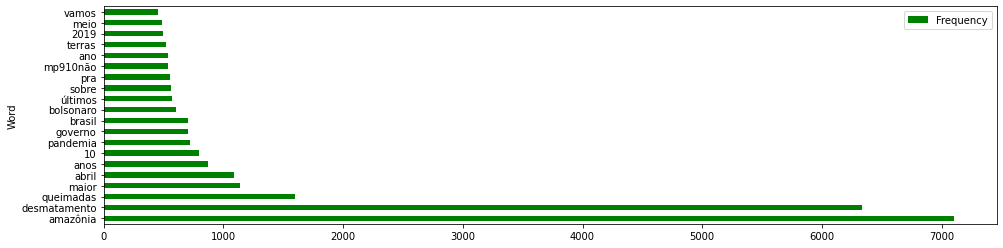

In [82]:
p = Counter(" ".join(clean_tweet(str(review)) for review in ponto_pico_may_20["tweet"]).split()).most_common(20)
rslt = pd.DataFrame(p, columns=['Word', 'Frequency'])
print(rslt)
rslt.plot.barh(x="Word", figsize=(16,4), color='g');

              User  Frequency
0    informetrica1        186
1         proindio         48
2    climainfonews         39
3      vanecosta10         31
4       wwf_brasil         28
5     altamir_oliv         25
6        obind_unb         23
7     marcelozelic         23
8     greenpeacebr         23
9    laecioalencar         21
10         faconti         20
11   valeriosobral         20
12      niltotatto         20
13            grqm         20
14    thinkfloyd61         18
15  socioambiental         18
16          imazon         18
17       ctavictor         18
18        gojammaj         16
19   ipam_amazonia         15


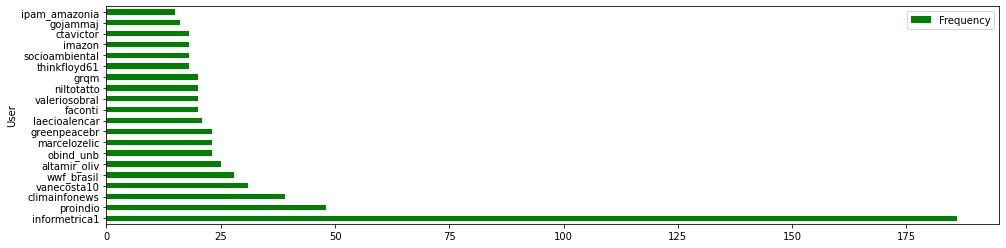

In [83]:
p = Counter(" ".join(str(user) for user in ponto_pico_may_20["username"]).split()).most_common(20)
rslt = pd.DataFrame(p, columns=['User', 'Frequency'])
print(rslt)
rslt.plot.barh(x="User", figsize=(16,4), color='g');

In [87]:
ponto_pico_may_20.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest', 'Raiva', 'Antecipação', 'Nojo', 'Medo', 'Alegria',
       'Tristeza', 'Surpesa', 'Confiança', 'Negativo', 'Positivo', 'Neutro',
       'Sentiment'],
      dtype='object')

In [99]:
top_tweets = ponto_pico_may_20[["tweet", "retweets_count"]]
for tweet in top_tweets.sort_values("retweets_count", ascending=False).head(5)["tweet"]:
    print(f"TWEET: {tweet}")

TWEET: Mesmo quando a #pandemia freia a economia, o garimpo e o #desmatamento ilegal em terras indígenas na #Amazônia permanecem a todo vapor. Artigo de @deiarauscher e @mlcanineu da @hrw_brasil para @elpais_brasil   https://t.co/JtlSyHZ2qj
TWEET: Importante ação para a obtenção de recursos para o combate ao desmatamento  da #Amazônia. É a atuação do @mmeioambiente no #ConselhodaAmazoniaLegal  https://t.co/6PxIMkesc7
TWEET: A operação “Verde Brasil 2” foi lançada pelo governo Jair Bolsonaro para combater o desmatamento ilegal e focos de incêndio na #Amazônia.   https://t.co/ZNbP1U1dzq
TWEET: Enquanto as emissões de gases de efeito estufa desabam no mundo com a pandemia, no Brasil elas explodem: resultado do estímulo governamental à invasão de terras, ou seja, ao desmatamento na Amazônia  https://t.co/CVkfFTLWcK @tassoazevedo explica os números hoje às 14:00 @obsclima
TWEET: “500 dias de negacionismo do aquecimento global, corrupção e má gestão no ministério do meio ambiente. Salles é u

# timeline sem pico atipico de tweets

In [84]:
# ponto anormal
# ponto_pico_jul_agos_19 = data.loc['2019-08-01':'2019-09-30']
start_date = "2019/08/01"
end_date = "2019/09/30"

start_date_form =  datetime.strptime(start_date, '%Y/%m/%d').date()
before_end_date_form = datetime.strptime(end_date, '%Y/%m/%d').date()

# print(f"after: {after_start_date} before {before_end_date}")

# ponto_pico_jul_agos_19 = data.loc[before_end_date:after_start_date]
data_wo_outlier = data[(data['date'] > before_end_date_form) & (data['date'] < start_date_form)]

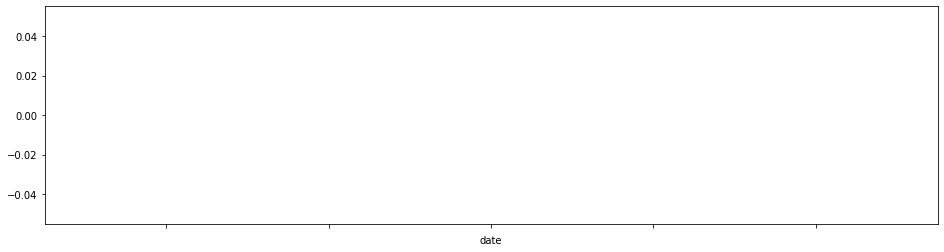

In [85]:
tpd = pd.Series(data_wo_outlier['date'].value_counts(), index=data_wo_outlier['date'])
tpd.plot(figsize=(16,4), color='b');

In [86]:
pos_sentiment_percent_data_clean = get_value_percent(data_wo_outlier, "Sentiment", 1)
neg_sentiment_percent_data_clean = get_value_percent(data_wo_outlier, "Sentiment", -1)
neu_sentiment_percent_data_clean = get_value_percent(data_wo_outlier, "Sentiment", 0)

print(f"Porcentagem de Tweets Positivos: {pos_sentiment_percent_data_clean}%")
print(f"Porcentagem de Tweets Negativos: {neg_sentiment_percent_data_clean}%")
print(f"Porcentagem de Tweets Neutros: {neu_sentiment_percent_data_clean}%")

ZeroDivisionError: division by zero